# Resolução do Problema das 8 rainhas utilizando o algoritmo de Holland

## Problema das 8 rainhas

O problema das 8 rainhas é um problema de lógica e matemática que consiste em colocar 8 rainhas em um tabuleiro de xadrez de 8x8 de forma que nenhuma delas sejam atacadas pelas demais. O objetivo é encontrar todas as soluções possíveis para esse problema. É considerado um problema clássico de inteligência artificial e programação.

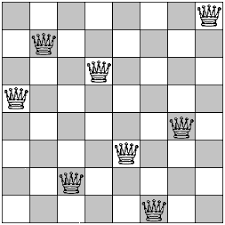



## Algoritmo de Holland

O Algoritmo de Holland é um algoritmo genético, que é um tipo de algoritmo de otimização inspirado no processo evolutivo da natureza. Ele foi desenvolvido por John Holland na década de 1970 e é usado para resolver problemas complexos de otimização. O algoritmo funciona criando uma população inicial de soluções possíveis para o problema e, em seguida, usando operações de seleção, recombinação e mutação para evoluir a população ao longo de várias gerações, com o objetivo de encontrar a solução ótima. É amplamente utilizado em muitos campos, incluindo engenharia, ciência da computação e finanças.

In [ ]:
# imports necessários

import random

In [7]:
# Função que avalia a aptidão de um indivíduo

def avalia_aptidao(individuo):
    aptidao = 0
    n = len(individuo)
    # Verifica se há rainhas na mesma coluna ou na mesma diagonal
    for i in range(n):
        for j in range(i+1, n):
            if individuo[i] == individuo[j]:
                aptidao += 1
            elif abs(i - j) == abs(individuo[i] - individuo[j]):
                aptidao += 1
    return aptidao

In [8]:
# Função que gera a população inicial

# n: numero de rainhas no tabuleiro
# size: número de indivíduos que formam a população (que foi gerada aleatoriamente)

def gera_populacao(n, size):
    populacao = []
    # Gera indivíduos aleatórios
    for i in range(size):
        individuo = random.sample(range(n), n)
        populacao.append((individuo, avalia_aptidao(individuo)))
    return populacao

In [4]:
# Função que seleciona os melhores indivíduos

# populacao: é a lista de indivíduos que formam a população do algoritmo genético
# n_elites: número de indivíduos que serão selecionados para a próxima geração sem serem submetidos às operações de cruzamento e mutação

def selecao(populacao, n_elites):
    # Ordena a população pela aptidao
    populacao.sort(key=lambda x: x[1])
    # Seleciona os n_elites indivíduos com menor aptidao
    return populacao[:n_elites]

In [6]:
# Função que faz o cruzamento entre dois pais

# parent1: é o primeiro indivíduo a ser utilizado no cruzamento.
# parent2: é o segundo indivíduo a ser utilizado no cruzamento.

def cruzamento(parent1, parent2):
    # n é o tamanho da representação de cada indivíduo na população
    n = len(parent1)
    # define o ponto de corte no cruzamento dos pais, selecionando um número aleatório entre 0 e n-1
    c = random.randint(0, n - 1)
    # Cria dois filhos com partes dos pais
    return parent1[:c] + parent2[c:], parent2[:c] + parent1[c:]

In [9]:
# Função que realiza a mutação em um indivíduo

# individuo: é o indivíduo que será submetido à mutação.
# p: é a probabilidade de que uma mutação ocorra em um gene específico do indivíduo.

def mutacao(individuo, p):
    # n é o tamanho do tabuleiro
    n = len(individuo)
    # Verifica se a mutação será realizada
    if random.random() < p:
        i = random.randint(0, n - 1)
        j = random.randint(0, n - 1)
        # Troca aleatoriamente dois elementos
        individuo[i], individuo[j] = individuo[j], individuo[i]
    return individuo, avalia_aptidao(individuo)

In [11]:
# Função principal que implementa o Algoritmo de Holland

# n: o tamanho do problema, ou seja, o número de rainhas (8 para o problema das oito rainhas).
# size: o tamanho da população de indivíduos.
# n_elites: o número de indivíduos "elite" a serem mantidos na próxima geração.
# p_mutacao: a probabilidade de que um indivíduo sofra mutação.
# n_generations: o número de gerações que o algoritmo irá executar.

def holland(n, size, n_elites, p_mutacao, n_geracoes):
   # Gera a população inicial
    populacao = gera_populacao(n, size)
    # Executa o algoritmo por n_geracoes
    for i in range(n_geracoes):
        # Seleciona os melhores indivíduos
        populacao = selecao(populacao, n_elites)
        nova_populacao = []
        # Gera novos indivíduos por meio de crossover e mutação
        for j in range(0, size, 2):
            parent1, parent2 = random.sample(populacao, 2)
            child1, child2 = cruzamento(parent1[0], parent2[0])
            child1, aptidao1 = mutacao(child1, p_mutacao)
            child2, aptdao2 = mutacao(child2, p_mutacao)
            nova_populacao.append((child1, aptidao1))
            nova_populacao.append((child2, aptdao2))
        populacao = nova_populacao
    # forma de ordenar a lista de acordo com a avaliação da aptidão dos indivíduos
    populacao.sort(key=lambda x: x[1])
    return populacao[0][0]

In [12]:
# elaborando uma solução

resultado = holland(8, 100, 20, 0.01, 100)
print(resultado)

# resultado será um array onde cada posição indica a coluna do tabuleiro em que a rainha se encontra e o valor contido nela a linha

# Por exemplo, no array [6, 4, 2, 0, 3, 1, 7, 5], o número 6 indica que a rainha na coluna 0 está posicionada na linha 6.

[6, 4, 2, 0, 3, 1, 7, 5]
